# DTOcean Wave Hydrodynamics Database Test

In [1]:
%matplotlib inline

In [2]:
from IPython.display import display, HTML

In [3]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (14.0, 8.0)

In [4]:
import numpy as np
import time

In [5]:
from dtocean_core import start_logging
from dtocean_core.core import Core
from dtocean_core.menu import DataMenu, ModuleMenu, ProjectMenu
from dtocean_core.pipeline import Tree

In [6]:
def html_list(x):
    message = "<ul>"
    for name in x:
        message += "<li>{}</li>".format(name)
    message += "</ul>"
    return message
def html_dict(x):
    message = "<ul>"
    for name, status in x.iteritems():
        message += "<li>{}: <b>{}</b></li>".format(name, status)
    message += "</ul>"
    return message

In [7]:
# Bring up the logger
start_logging()

2016-10-03 11:26:53,605 - INFO - dtocean_core - Begin logging for dtocean_core.


In [8]:
start_time = time.ctime()
print "Start time is ", start_time

Start time is  Mon Oct 03 11:26:53 2016


## Create the core, menus and pipeline tree

The core object carrys all the system information and is operated on by the other classes

In [9]:
new_core = Core()
data_menu = DataMenu()
project_menu = ProjectMenu()
module_menu = ModuleMenu()
pipe_tree = Tree()

2016-10-03 11:26:55,901 - DEBUG - aneris.control.data - Searching for Structure classes
2016-10-03 11:26:55,986 - DEBUG - aneris.control.sockets - Searching for ProjectInterface classes
2016-10-03 11:26:56,082 - DEBUG - aneris.control.sockets - Searching for ModuleInterface classes
2016-10-03 11:26:56,515 - DEBUG - aneris.control.sockets - Searching for ThemeInterface classes
2016-10-03 11:26:56,530 - DEBUG - aneris.control.sockets - Searching for FileInputInterface classes
2016-10-03 11:26:56,530 - DEBUG - aneris.control.sockets - Searching for FileOutputInterface classes
2016-10-03 11:26:56,530 - DEBUG - aneris.control.sockets - Searching for QueryInterface classes
2016-10-03 11:26:56,530 - DEBUG - aneris.control.sockets - Searching for RawInterface classes
2016-10-03 11:26:56,532 - DEBUG - aneris.control.sockets - Searching for PlotInterface classes


## Create a new project

In [10]:
project_title = "DTOcean"  
new_project = project_menu.new_project(new_core, project_title)

2016-10-03 11:26:56,816 - INFO - aneris.entity.simulation - Created new Simulation with title "Default"
2016-10-03 11:26:56,816 - DEBUG - dtocean_core.core - Setting execution level to initial
2016-10-03 11:26:56,816 - DEBUG - dtocean_core.core - Setting inspection level to initial
2016-10-03 11:26:56,816 - DEBUG - aneris.control.data - DataState with level "initial" created
2016-10-03 11:26:56,816 - INFO - aneris.control.simulation - Datastate with level "initial" stored
2016-10-03 11:26:56,818 - DEBUG - aneris.control.simulation - Merging active DataStates.
2016-10-03 11:26:56,818 - INFO - aneris.control.pipeline - New Hub created for interface ProjectInterface.
2016-10-03 11:26:56,818 - DEBUG - aneris.control.simulation - Getting output status for interface "System Type Selection".
2016-10-03 11:26:56,818 - DEBUG - aneris.control.simulation - Getting input status for interface "System Type Selection".


## Connect to a database

In [11]:
data_menu.select_database(new_project, "local")

2016-10-03 11:26:56,818 - DEBUG - dtocean_core.menu - Host: localhost Port: 5432 OPEN


## Set the device type

In [12]:
options_branch = pipe_tree.get_branch(new_core, new_project, "System Type Selection")
variable_id = "device.system_type"
my_var = options_branch.get_input_variable(new_core, new_project, variable_id)
my_var.set_raw_interface(new_core, "Wave Floating")
my_var.read(new_core, new_project)

2016-10-03 11:26:56,838 - DEBUG - dtocean_core.pipeline - Reading variables device.system_type
2016-10-03 11:26:56,844 - DEBUG - aneris.control.data - DataState created
2016-10-03 11:26:56,845 - INFO - aneris.control.data - New "device.system_type" data stored with index QUNCMK
2016-10-03 11:26:56,848 - INFO - aneris.control.simulation - Datastate stored
2016-10-03 11:26:56,852 - DEBUG - aneris.control.simulation - Merging active DataStates.
2016-10-03 11:26:56,854 - DEBUG - aneris.control.simulation - Getting output status for interface "System Type Selection".
2016-10-03 11:26:56,855 - DEBUG - aneris.control.simulation - Getting input status for interface "System Type Selection".


## Initiate the pipeline
This step will be important when the database is incorporated into the system as it will effect the operation of the pipeline.

In [13]:
project_menu.initiate_pipeline(new_core, new_project)

2016-10-03 11:26:56,862 - DEBUG - dtocean_core.core - Setting inspection level to system type selection start
2016-10-03 11:26:56,864 - DEBUG - aneris.control.data - DataState with level "system type selection start" created
2016-10-03 11:26:56,865 - INFO - aneris.control.simulation - Datastate with level "system type selection start" stored
2016-10-03 11:26:56,867 - DEBUG - aneris.control.simulation - Merging active DataStates.
2016-10-03 11:26:56,868 - DEBUG - aneris.control.simulation - Retrieving data with identity "device.system_type".
2016-10-03 11:26:56,869 - DEBUG - aneris.control.data - Retrieving "device.system_type" data stored with index QUNCMK from pool
2016-10-03 11:26:56,875 - DEBUG - aneris.control.data - DataState with level "system type selection output" created
2016-10-03 11:26:56,877 - INFO - aneris.control.data - New "hidden.pipeline_active" data stored with index O0LSF8
2016-10-03 11:26:56,878 - INFO - aneris.control.simulation - Datastate with level "system type 

## Retrieve the available site and technology options from the DB

In [14]:
project_menu.initiate_options(new_core, new_project)

2016-10-03 11:26:57,190 - DEBUG - dtocean_core.core - Setting inspection level to site and system options start
2016-10-03 11:26:57,190 - DEBUG - aneris.control.data - DataState with level "site and system options start" created
2016-10-03 11:26:57,190 - INFO - aneris.control.simulation - Datastate with level "site and system options start" stored
2016-10-03 11:26:57,190 - DEBUG - aneris.control.simulation - Merging active DataStates.
2016-10-03 11:26:57,193 - DEBUG - aneris.control.simulation - Retrieving data with identity "device.system_type".
2016-10-03 11:26:57,194 - DEBUG - aneris.control.data - Retrieving "device.system_type" data stored with index QUNCMK from pool
2016-10-03 11:26:57,197 - DEBUG - aneris.control.simulation - Retrieving data with identity "hidden.available_sites".
2016-10-03 11:26:57,197 - DEBUG - aneris.control.data - Retrieving "hidden.available_sites" data stored with index BAZWR4 from pool
2016-10-03 11:26:57,200 - DEBUG - aneris.control.simulation - Retriev

In [15]:
options_branch = pipe_tree.get_branch(new_core, new_project, "Site and System Options")
input_status = options_branch.get_output_status(new_core, new_project)
message = html_dict(input_status)
HTML(message)

## Check available device names

In [16]:
my_var = options_branch.get_output_variable(new_core, new_project, "device.available_names")
site_list = my_var.get_value(new_core, new_project)
msg = html_list(site_list)
HTML(msg)

2016-10-03 11:26:57,263 - DEBUG - aneris.control.simulation - Retrieving data with identity "device.available_names".
2016-10-03 11:26:57,265 - DEBUG - aneris.control.data - Retrieving "device.available_names" data stored with index Y6A8XX from pool


## Select a device

In [17]:
filter_branch = pipe_tree.get_branch(new_core, new_project, 'Database Filtering Interface')
new_var = filter_branch.get_input_variable(new_core, new_project,
                                            "device.selected_name")
new_var.set_raw_interface(new_core, "Pelamis")
new_var.read(new_core, new_project)

2016-10-03 11:26:57,278 - DEBUG - dtocean_core.pipeline - Reading variables device.selected_name
2016-10-03 11:26:57,279 - DEBUG - aneris.control.data - DataState created
2016-10-03 11:26:57,280 - INFO - aneris.control.data - New "device.selected_name" data stored with index EDME2D
2016-10-03 11:26:57,282 - INFO - aneris.control.simulation - Datastate stored
2016-10-03 11:26:57,283 - DEBUG - aneris.control.simulation - Merging active DataStates.
2016-10-03 11:26:57,285 - DEBUG - aneris.control.simulation - Getting output status for interface "Site and System Options".
2016-10-03 11:26:57,286 - DEBUG - aneris.control.simulation - Getting output status for interface "Lease Area Selection".
2016-10-03 11:26:57,288 - DEBUG - aneris.control.simulation - Getting output status for interface "Database Filtering Interface".
2016-10-03 11:26:57,289 - DEBUG - aneris.control.simulation - Getting output status for interface "System Type Selection".
2016-10-03 11:26:57,290 - DEBUG - aneris.control.s

In [18]:
input_status = filter_branch.get_input_status(new_core, new_project)
message = html_dict(input_status)
HTML(message)

## Check the available site names

In [19]:
available_locations = options_branch.get_output_variable(new_core, new_project,
                                                         "site.available_names")
message = html_list(available_locations.get_value(new_core, new_project))
message = "<h3>Available Locations</h3>" + message
HTML(message)

2016-10-03 11:26:57,315 - DEBUG - aneris.control.simulation - Retrieving data with identity "site.available_names".
2016-10-03 11:26:57,316 - DEBUG - aneris.control.data - Retrieving "site.available_names" data stored with index TH672T from pool


## Add the site location

In [20]:
new_var = filter_branch.get_input_variable(new_core, new_project,
                                           "site.selected_name")
new_var.set_raw_interface(new_core, "shetland")
new_var.read(new_core, new_project)

2016-10-03 11:26:57,339 - DEBUG - dtocean_core.pipeline - Reading variables site.selected_name
2016-10-03 11:26:57,342 - DEBUG - aneris.control.data - DataState created
2016-10-03 11:26:57,342 - INFO - aneris.control.data - New "site.selected_name" data stored with index 225J0J
2016-10-03 11:26:57,344 - INFO - aneris.control.simulation - Datastate stored
2016-10-03 11:26:57,345 - DEBUG - aneris.control.simulation - Merging active DataStates.
2016-10-03 11:26:57,346 - DEBUG - aneris.control.simulation - Getting output status for interface "Site and System Options".
2016-10-03 11:26:57,348 - DEBUG - aneris.control.simulation - Getting output status for interface "Lease Area Selection".
2016-10-03 11:26:57,349 - DEBUG - aneris.control.simulation - Getting output status for interface "Database Filtering Interface".
2016-10-03 11:26:57,351 - DEBUG - aneris.control.simulation - Getting output status for interface "System Type Selection".
2016-10-03 11:26:57,352 - DEBUG - aneris.control.simul

In [21]:
input_status = filter_branch.get_input_status(new_core, new_project)
message = html_dict(input_status)
HTML(message)

## Collect the bathymetric data
The lease area polygon may be editied following this step.

In [22]:
project_menu.initiate_bathymetry(new_core, new_project)

2016-10-03 11:26:57,371 - DEBUG - dtocean_core.core - Setting inspection level to lease area selection start
2016-10-03 11:26:57,371 - DEBUG - aneris.control.data - DataState with level "lease area selection start" created
2016-10-03 11:26:57,371 - INFO - aneris.control.simulation - Datastate with level "lease area selection start" stored
2016-10-03 11:26:57,374 - DEBUG - aneris.control.simulation - Merging active DataStates.
2016-10-03 11:26:57,375 - DEBUG - aneris.control.simulation - Retrieving data with identity "hidden.available_sites".
2016-10-03 11:26:57,375 - DEBUG - aneris.control.data - Retrieving "hidden.available_sites" data stored with index BAZWR4 from pool
2016-10-03 11:26:57,378 - DEBUG - aneris.control.simulation - Retrieving data with identity "site.selected_name".
2016-10-03 11:26:57,380 - DEBUG - aneris.control.data - Retrieving "site.selected_name" data stored with index 225J0J from pool
2016-10-03 11:26:57,381 - DEBUG - aneris.control.simulation - Retrieving data 

## Filter the database

In [23]:
project_menu.initiate_filter(new_core, new_project)

2016-10-03 11:26:57,424 - DEBUG - dtocean_core.core - Setting inspection level to database filtering interface start
2016-10-03 11:26:57,426 - DEBUG - aneris.control.data - DataState with level "database filtering interface start" created
2016-10-03 11:26:57,427 - INFO - aneris.control.simulation - Datastate with level "database filtering interface start" stored
2016-10-03 11:26:57,428 - DEBUG - aneris.control.simulation - Merging active DataStates.
2016-10-03 11:26:57,430 - DEBUG - aneris.control.simulation - Retrieving data with identity "hidden.available_sites".
2016-10-03 11:26:57,431 - DEBUG - aneris.control.data - Retrieving "hidden.available_sites" data stored with index BAZWR4 from pool
2016-10-03 11:26:57,434 - DEBUG - aneris.control.simulation - Retrieving data with identity "site.selected_name".
2016-10-03 11:26:57,434 - DEBUG - aneris.control.data - Retrieving "site.selected_name" data stored with index 225J0J from pool
2016-10-03 11:26:57,437 - DEBUG - aneris.control.simul

## Discover available modules

In [24]:
names = module_menu.get_available(new_core, new_project)
message = html_list(names)
HTML(message)

## Activate a module

Note that the order of activation is important and that we can't deactivate yet!

In [25]:
module_name = 'Hydrodynamics'
module_menu.activate(new_core, new_project, module_name)

2016-10-03 11:27:12,749 - DEBUG - aneris.control.simulation - Getting output status for interface "Site and System Options".
2016-10-03 11:27:12,750 - DEBUG - aneris.control.simulation - Getting output status for interface "Lease Area Selection".
2016-10-03 11:27:12,753 - DEBUG - aneris.control.simulation - Getting output status for interface "Database Filtering Interface".
2016-10-03 11:27:12,756 - DEBUG - aneris.control.simulation - Getting output status for interface "Project Boundaries Interface".
2016-10-03 11:27:12,759 - DEBUG - aneris.control.simulation - Getting output status for interface "System Type Selection".
2016-10-03 11:27:12,760 - DEBUG - aneris.control.simulation - Getting output status for interface "Hydrodynamics".
2016-10-03 11:27:12,763 - DEBUG - aneris.control.simulation - Getting input status for interface "Site and System Options".
2016-10-03 11:27:12,766 - DEBUG - aneris.control.simulation - Getting input status for interface "Lease Area Selection".
2016-10-03

## Check the status of the module inputs

In [26]:
hydro_branch = pipe_tree.get_branch(new_core, new_project, 'Hydrodynamics')
input_status = hydro_branch.get_input_status(new_core, new_project)
message = html_dict(input_status)
HTML(message)

## Initiate the dataflow
This indicates that the filtering and module / theme selections are complete

In [27]:
project_menu.initiate_dataflow(new_core, new_project)

2016-10-03 11:27:12,867 - DEBUG - aneris.control.data - DataState created
2016-10-03 11:27:12,868 - INFO - aneris.control.data - New "hidden.dataflow_active" data stored with index Y6KXY5
2016-10-03 11:27:12,869 - INFO - aneris.control.simulation - Datastate stored
2016-10-03 11:27:12,871 - DEBUG - aneris.control.simulation - Merging active DataStates.
2016-10-03 11:27:12,871 - DEBUG - aneris.control.simulation - Getting output status for interface "Site and System Options".
2016-10-03 11:27:12,874 - DEBUG - aneris.control.simulation - Getting output status for interface "Lease Area Selection".
2016-10-03 11:27:12,875 - DEBUG - aneris.control.simulation - Getting output status for interface "Database Filtering Interface".
2016-10-03 11:27:12,875 - DEBUG - aneris.control.simulation - Getting output status for interface "Project Boundaries Interface".
2016-10-03 11:27:12,878 - DEBUG - aneris.control.simulation - Getting output status for interface "System Type Selection".
2016-10-03 11:2

## See what state levels are available

In [28]:
message = html_list(new_core.get_levels(new_project))
HTML(message)

## Move the system to the post-filter state and ready the system

In [29]:
new_core.inspect_level(new_project, "modules initial")
new_core.reset_level(new_project, preserve_level=True)

2016-10-03 11:27:12,959 - INFO - dtocean_core.core - Inspecting level modules initial
2016-10-03 11:27:12,960 - DEBUG - dtocean_core.core - Setting inspection level to modules initial
2016-10-03 11:27:12,960 - DEBUG - aneris.control.simulation - Getting output status for interface "Site and System Options".
2016-10-03 11:27:12,963 - DEBUG - aneris.control.simulation - Getting output status for interface "Lease Area Selection".
2016-10-03 11:27:12,963 - DEBUG - aneris.control.simulation - Getting output status for interface "Database Filtering Interface".
2016-10-03 11:27:12,964 - DEBUG - aneris.control.simulation - Getting output status for interface "Project Boundaries Interface".
2016-10-03 11:27:12,967 - DEBUG - aneris.control.simulation - Getting output status for interface "System Type Selection".
2016-10-03 11:27:12,967 - DEBUG - aneris.control.simulation - Getting output status for interface "Hydrodynamics".
2016-10-03 11:27:12,970 - DEBUG - aneris.control.simulation - Getting i

## Get data using DTOcean DB

Using the auto_connect method on a branch, we can pull available variables from the database

In [30]:
hydro_branch.read_auto(new_core, new_project)
input_status = hydro_branch.get_input_status(new_core, new_project)
message = html_dict(input_status)
HTML(message)


2016-10-03 11:27:13,108 - DEBUG - dtocean_core.pipeline - Reading variables farm.rated_power
2016-10-03 11:27:13,164 - DEBUG - dtocean_core.pipeline - Reading variables device.wave_data_directory
2016-10-03 11:27:13,217 - DEBUG - dtocean_core.pipeline - Reading variables device.installation_depth_min
2016-10-03 11:27:13,270 - DEBUG - dtocean_core.pipeline - Reading variables device.minimum_distance_y
2016-10-03 11:27:13,321 - DEBUG - dtocean_core.pipeline - Reading variables device.minimum_distance_x
2016-10-03 11:27:13,375 - DEBUG - dtocean_core.pipeline - Reading variables farm.spec_gamma
2016-10-03 11:27:13,427 - DEBUG - aneris.control.simulation - Retrieving data with identity "site.lease_boundary".
2016-10-03 11:27:13,428 - DEBUG - aneris.control.data - Retrieving "site.lease_boundary" data stored with index JQBLTI from pool
2016-10-03 11:27:13,430 - DEBUG - dtocean_core.pipeline - Reading variables bathymetry.layers, farm.mannings
2016-10-03 11:27:13,456 - DEBUG - aneris.utilitie

## Check if the module can be executed

In [31]:
can_execute = module_menu.is_executable(new_core, new_project, module_name)
display(can_execute)

False

In [32]:
input_status = hydro_branch.get_input_status(new_core, new_project)
message = html_dict(input_status)
HTML(message)

## Enter user options

In [33]:
user_array_option = hydro_branch.get_input_variable(new_core, new_project, "options.user_array_option")
user_array_option.set_raw_interface(new_core, "Staggered")
user_array_option.read(new_core, new_project)

optimisation_threshold = hydro_branch.get_input_variable(new_core, new_project, "options.optimisation_threshold")
optimisation_threshold.set_raw_interface(new_core, 0.9)
optimisation_threshold.read(new_core, new_project)

2016-10-03 11:28:23,417 - DEBUG - dtocean_core.pipeline - Reading variables options.user_array_option
2016-10-03 11:28:23,420 - DEBUG - aneris.control.data - DataState created
2016-10-03 11:28:23,421 - INFO - aneris.control.data - New "options.user_array_option" data stored with index V5VO34
2016-10-03 11:28:23,421 - INFO - aneris.control.simulation - Datastate stored
2016-10-03 11:28:23,424 - DEBUG - aneris.control.simulation - Merging active DataStates.
2016-10-03 11:28:23,427 - DEBUG - aneris.control.simulation - Getting output status for interface "Site and System Options".
2016-10-03 11:28:23,428 - DEBUG - aneris.control.simulation - Getting output status for interface "Lease Area Selection".
2016-10-03 11:28:23,430 - DEBUG - aneris.control.simulation - Getting output status for interface "Database Filtering Interface".
2016-10-03 11:28:23,431 - DEBUG - aneris.control.simulation - Getting output status for interface "Project Boundaries Interface".
2016-10-03 11:28:23,433 - DEBUG -

## Check if the module can be executed

In [34]:
can_execute = module_menu.is_executable(new_core, new_project, module_name)
display(can_execute)

True

In [35]:
input_status = hydro_branch.get_input_status(new_core, new_project)
message = html_dict(input_status)
HTML(message)

## Execute the current module

The "current" module refers to the next module to be executed in the chain (pipeline) of modules. This command will only execute that module and another will be used for executing all of the modules at once.

Note, any data supplied by the module will be automatically copied into the active data state.

In [36]:
module_menu.execute_current(new_core, new_project)

2016-10-03 11:28:23,595 - DEBUG - dtocean_core.core - Setting inspection level to hydrodynamics start
2016-10-03 11:28:23,596 - DEBUG - aneris.control.data - DataState with level "hydrodynamics start" created
2016-10-03 11:28:23,598 - INFO - aneris.control.simulation - Datastate with level "hydrodynamics start" stored
2016-10-03 11:28:23,599 - DEBUG - aneris.control.simulation - Merging active DataStates.
2016-10-03 11:28:23,601 - DEBUG - aneris.control.simulation - Checking mask status for input "device.bidirection".
2016-10-03 11:28:23,601 - DEBUG - aneris.control.simulation - Retrieving data with identity "device.system_type".
2016-10-03 11:28:23,602 - DEBUG - aneris.control.data - Retrieving "device.system_type" data stored with index QUNCMK from pool
2016-10-03 11:28:23,604 - DEBUG - aneris.control.simulation - Checking mask status for input "device.cut_in_velocity".
2016-10-03 11:28:23,605 - DEBUG - aneris.control.simulation - Retrieving data with identity "device.system_type".
2

## Examine the results

Currently, there is no robustness built into the core, so the assumption is that the module executed successfully. This will have to be improved towards deployment of the final software.

Let's check the number of devices and annual output of the farm, using just information in the data object.

In [37]:
n_devices = new_core.get_data_value(new_project, "farm.number_of_devices")
meta = new_core.get_metadata("farm.number_of_devices")
name = meta.title
message_one = "<p><b>{}:</b> {}</p>".format(name, n_devices)

farm_annual_energy = new_core.get_data_value(new_project, "farm.annual_energy")
meta = new_core.get_metadata("farm.annual_energy")
name = meta.title
value = farm_annual_energy
units = meta.units[0]
message_two = "<p><b>{}:</b> <i>{}</i> ({})</p>".format(name, value, units)

HTML(message_one + message_two)

2016-10-03 11:34:00,062 - DEBUG - aneris.control.simulation - Retrieving data with identity "farm.number_of_devices".
2016-10-03 11:34:00,062 - DEBUG - aneris.control.data - Retrieving "farm.number_of_devices" data stored with index W84CC1 from pool
2016-10-03 11:34:00,062 - DEBUG - aneris.control.simulation - Retrieving data with identity "farm.annual_energy".
2016-10-03 11:34:00,062 - DEBUG - aneris.control.data - Retrieving "farm.annual_energy" data stored with index B9QFOK from pool


## Plotting some graphs

By having data objects with set formats it should be possible to create automated plot generation. However, some plots may be too complex and some special cases may need defined.

In [38]:
mean_power_per_dev_value = new_core.get_data_value(new_project, 
                                                      "farm.mean_power_per_device")
meta = new_core.get_metadata("farm.mean_power_per_device")

chart_values = np.array(mean_power_per_dev_value.values())

2016-10-03 11:34:00,076 - DEBUG - aneris.control.simulation - Retrieving data with identity "farm.mean_power_per_device".
2016-10-03 11:34:00,076 - DEBUG - aneris.control.data - Retrieving "farm.mean_power_per_device" data stored with index NKAAE4 from pool


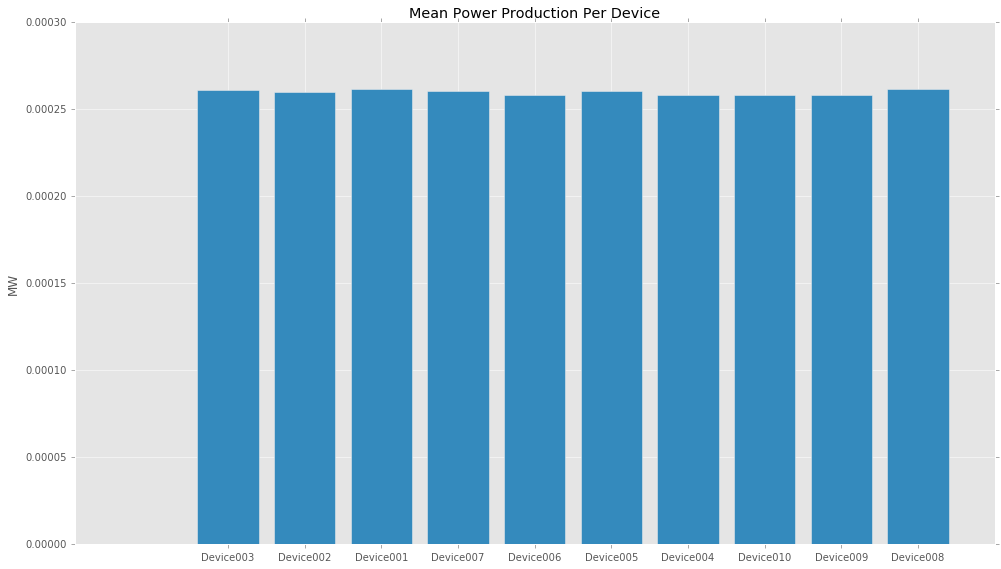

In [39]:
plt.bar(range(len(mean_power_per_dev_value)),
        chart_values,
        align='center')
            
plt.xticks(range(len(mean_power_per_dev_value)),
          mean_power_per_dev_value.keys())
plt.title(meta.title)

plt.ylabel(meta.units[0])

plt.tight_layout()
# plt.savefig('annual_power_per_device.png')
plt.show()

## Plotting the Layout

This may require such a special case. It is not clear is a new data type is required or just special plots associated to variable IDs.

In [40]:
layout_value = new_core.get_data_value(new_project, "farm.layout")
layout_meta = new_core.get_metadata("farm.layout")

2016-10-03 11:34:00,404 - DEBUG - aneris.control.simulation - Retrieving data with identity "farm.layout".
2016-10-03 11:34:00,404 - DEBUG - aneris.control.data - Retrieving "farm.layout" data stored with index PSGGB1 from pool


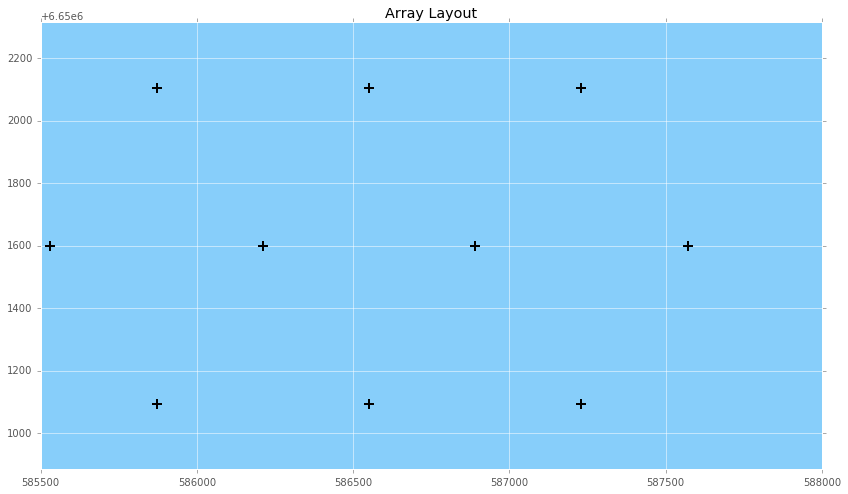

In [41]:
x = []
y = []

for coords in layout_value.itervalues():
    
    x.append(coords.x)
    y.append(coords.y)

fig = plt.figure()
ax1 = fig.add_subplot(1,1,1, axisbg='lightskyblue')
ax1.plot(x,y,'k+', mew=2, markersize=10)
plt.title(layout_meta.title)
plt.axis('equal')
plt.show()

In [42]:
end_time = time.ctime()
print "DB collection end time is ", end_time

DB collection end time is  Mon Oct 03 11:34:00 2016
